#Book Recommendation System

Name: Disha Jethva

Date: 10.01.2024

#Data Exploration

Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import re
from scipy.sparse import csr_matrix

##Load Data

In [ ]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists("../data/data.sqlite"):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from database
con = create_engine('sqlite:///../data/data.sqlite')
item = pd.read_sql_table('item_data', con)
transaction = pd.read_sql_table('transaction_data', con)

Pre- Processing of the Items Data

In [ ]:
# Check if there are any columns with empty/null dataset ?
print('Check if there are any columns with empty/null dataset ?')
print(item.isnull().sum())

Check if there are any columns with empty/null dataset ?
itemID           0
title            0
author        3240
publisher        9
main topic     258
subtopics        1
dtype: int64


In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
item.loc[item.publisher.isnull()] = 'other'

Pre-Processing of the transaction data

In [ ]:
print(tr.shape)
print(list(tr.columns))

(365143, 5)
['sessionID', 'itemID', 'click', 'basket', 'order']


heatmap of the correlation matrix 


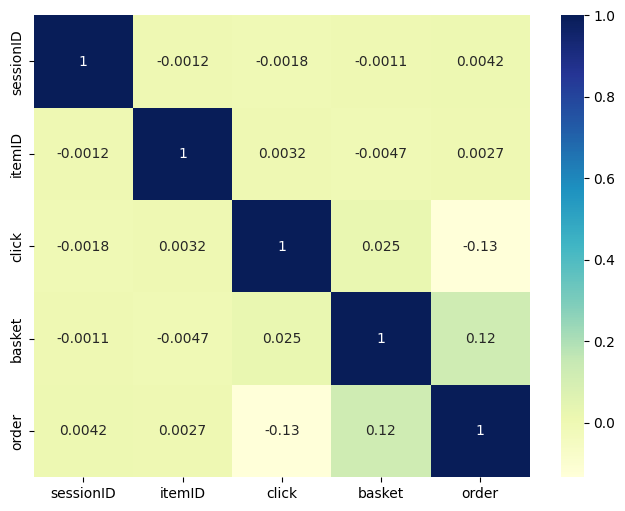

In [ ]:
# Plot a heatmap of the correlation matrix obtained above.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
print('heatmap of the correlation matrix ')
import seaborn as sb
dataplot = sb.heatmap(tr.corr(), cmap="YlGnBu", annot=True) #rainbow

<Axes: xlabel='click'>

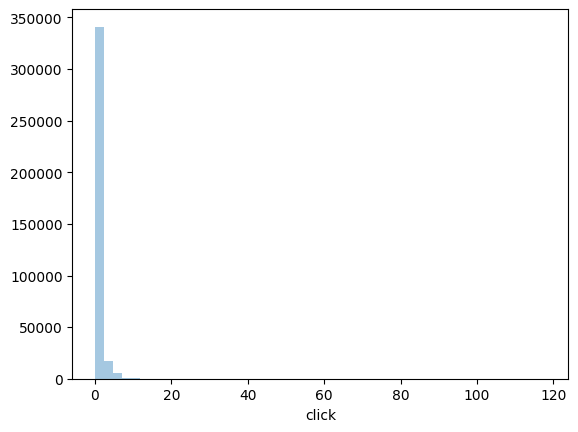

In [ ]:
sns.distplot(a=tr['click'], kde=False)

<Axes: xlabel='click', ylabel='Density'>

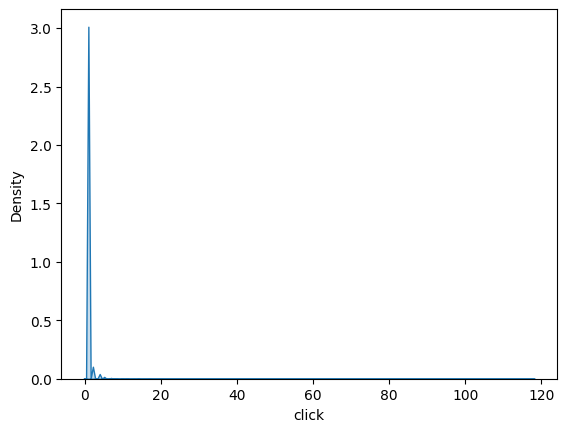

In [ ]:
sns.kdeplot(data=tr['click'], shade=True)

<Axes: xlabel='itemID', ylabel='order'>

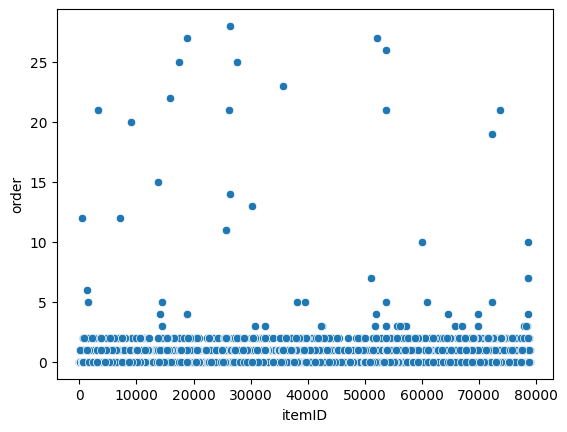

In [ ]:
sns.scatterplot(x=tr['itemID'], y=tr['order'])

In [ ]:
n_tr = tr.shape[0]
n_item = item.shape[0]
print(n_tr + n_item)

443173


In [ ]:
counts1 = tr['basket'].value_counts()
tr = tr[tr['basket'].isin(counts1[counts1 >= 200].index)]
counts = tr['click'].value_counts()
tr = tr[tr['click'].isin(counts[counts >= 100].index)]

Table of Content

1. Introduction
2. Data Overview
3. Analysis
4. Conclusion

#1. Introduction

Motivation

A recommendation system will help users who do not have enough individual knowledge to peruse through the different types of options offered by a website. It will provide the users with information to assist them to make a decision as to which items to purchase. The proposed work alters from the existingrecommendation systems since the existing ones only consider one technique to recommend items to the users.They do not recommend items using two or more techniques and are not a Hybrid Recommendation System.The proposed system uses combination of Collaborative Filtering and Association Rule Mining. CollaborativeFiltering is used to predict the ratings of a particular item by calculating ratings given to similar items orratings given by similar users. Association Rule Mining is used to extract different patterns and correlations between different items.

#2. Goal

The goal is to find the book recommendation system using three approaches:

1. Collaborative: In this approach, two users have similar interest and according to the other user interest, suggestion will be made.
2. Content based: In this technique, recommendation based on the features and users past interest, if any user used to like any genre, then recommendation wll be made accordingly.
3. Hybrid approach: Hybrid techniques utilize the useful features of both and try to eliminate the problems.Hybrid techniques increase the computing load of the system.

#Collaborative Filtering using K-Nearest Neighbour(KNN)

KNN is the machine learning algorithm to find clusters of similar users based on common book clicks and make prediction using average clicks of top k-nearest neighbour.

In [ ]:
combine = pd.merge(tr,item,on='itemID')
combine.head()

,sessionID,itemID,click,basket,order,title,author,publisher,main topic,subtopics
0,0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,89272,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
2,183856,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
3,1,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
4,771,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"


In [ ]:
y = tr['order']
X = tr.drop('order', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))

0.9540362280088307


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69574    64     0     0     0]
 [ 3234     1     0     0     0]
 [   49     0     0     0     0]
 [    3     0     0     0     0]
 [    2     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     69638
           1       0.02      0.00      0.00      3235
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.95     72927
   macro avg       0.19      0.20      0.20     72927
weighted avg       0.91      0.95      0.93     72927



In [ ]:
combine_book = pd.merge(tr,item,on='itemID')

combine_book.head()

,sessionID,itemID,click,basket,order,title,author,publisher,main topic,subtopics
0,0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,89272,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
2,183856,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
3,1,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
4,771,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"


In [ ]:
combine_book = combine_book.dropna(axis = 0, subset = ['title'])

book_clickCount = (combine_book.groupby(by= ['title'])['click'].count().reset_index().rename(columns = {'click':'totalclickCount'})[['title','totalclickCount']])
book_clickCount.head()

,title,totalclickCount
0,#Basteln for Future,22
1,#Instacat,5
2,#Sticker for Future,3
3,#Wir bleiben zuhause Kindermitmachbuch,208
4,#selbstschuld - Was heißt schon privat,11


In [ ]:
print(book_clickCount['totalclickCount'].quantile(np.arange(.9,1,.03)))

0.90    29.0 
0.93    45.0 
0.96    81.0 
0.99    205.0
Name: totalclickCount, dtype: float64


In [ ]:
#merge cobine_book table and book_clickCount
click_with_totalclickCount = combine_book.merge(book_clickCount, left_on='title', right_on='title', how='left')
click_with_totalclickCount.head()

,sessionID,itemID,click,basket,order,title,author,publisher,main topic,subtopics,totalclickCount
0,0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3
1,89272,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3
2,183856,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3
3,1,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59
4,771,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59


In [ ]:
#set theshold and if the totalclickCount is greater than threshold then only will consider
popularity_threshold = 50
click_popular_book = click_with_totalclickCount.query('totalclickCount >= @popularity_threshold')
click_popular_book.head()

,sessionID,itemID,click,basket,order,title,author,publisher,main topic,subtopics,totalclickCount
3,1,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59
4,771,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59
5,2411,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59
6,4023,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59
7,4243,73018,0,1,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",59


In [ ]:
click_popular_book.shape

(224606, 11)

In [ ]:
#First create pivot matrix
book_features_df = click_popular_book.pivot_table(index=['title','main topic','subtopics'], columns='basket', values='click').fillna(0)
book_features_df.head()

,,basket,0,1,2,3
title,main topic,subtopics,,,,
#Wir bleiben zuhause Kindermitmachbuch,YBGC,"[5AF,5JA,5JB,YBGC,YBL,YZG]",1.386139,1.400000,0.0,0.0
100 Gute-Laune-Rätsel - Fahrzeuge,YBCH,"[5AF,4CA,WHJ,YBGC,YBGH,YBLT,YNU,YNVP,YZG]",1.033333,1.000000,0.0,0.0
100 Gute-Laune-Rätsel - Ostern,YNVP,"[5AF,5HPF,4CA,YBG,YBL,YNVP,YZG]",1.352941,1.400000,3.0,3.0
100 Gute-Laune-Rätsel für den Kindergarten,YNVP,"[5AD,WDKC,WDKN,WH,WHJ,WZG,YBL,YNU,YNX,YZG]",1.560976,1.428571,1.0,6.0
100 Gute-Laune-Rätsel für die Vorschule,YPCA2,"[5AF,4CA,WDK,WHJ,YBGC,YBGH,YBLC,YBLH,YNVP,YPCA2,YZG]",1.133333,1.509434,3.0,0.0


In [ ]:
book_features_df_matrix = csr_matrix(book_features_df.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm='brute')
model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(book_features_df.shape[0])
print(query_index)
distance, indices = model_knn.kneighbors(book_features_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

376


In [ ]:
book_features_df.head()

,,basket,0,1,2,3
title,main topic,subtopics,,,,
#Wir bleiben zuhause Kindermitmachbuch,YBGC,"[5AF,5JA,5JB,YBGC,YBL,YZG]",1.386139,1.400000,0.0,0.0
100 Gute-Laune-Rätsel - Fahrzeuge,YBCH,"[5AF,4CA,WHJ,YBGC,YBGH,YBLT,YNU,YNVP,YZG]",1.033333,1.000000,0.0,0.0
100 Gute-Laune-Rätsel - Ostern,YNVP,"[5AF,5HPF,4CA,YBG,YBL,YNVP,YZG]",1.352941,1.400000,3.0,3.0
100 Gute-Laune-Rätsel für den Kindergarten,YNVP,"[5AD,WDKC,WDKN,WH,WHJ,WZG,YBL,YNU,YNX,YZG]",1.560976,1.428571,1.0,6.0
100 Gute-Laune-Rätsel für die Vorschule,YPCA2,"[5AF,4CA,WDK,WHJ,YBGC,YBGH,YBLC,YBLH,YNVP,YPCA2,YZG]",1.133333,1.509434,3.0,0.0


In [ ]:
book_features_df.columns

Int64Index([0, 1, 2, 3], dtype='int64', name='basket')

In [ ]:
for i in range(0, len(distance.flatten())):
  if i ==0:
    print('Recommendation for {0}:\n'.format(book_features_df.index[query_index]))
  else:
    print('{0}: {1}, with distance of {2}:'.format(i, book_features_df.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendation for ('Der kleine Vampir', 'YFH', '[5AG,5AJ,4CD,YFB,YFM,YFQ]'):

1: ('Percy Jackson - Auf Monsterjagd mit den Geschwistern Kane (Percy Jackson)', 'QRSA', '[5AN,QRSA,QRSG,YFB,YFC,YFH]'), with distance of 3.8320819939485773e-07:
2: ('Das Buch der seltsamen Wünsche', 'YXHB', '[5AL,YFC,YFM]'), with distance of 1.5608731215310812e-06:
3: ('Feuer und Blut - Erstes Buch', 'FBA', '[FBA,FMB,FYT]'), with distance of 1.6689276403081266e-06:
4: ('EXIT - Das Buch - Logbuch 1907', 'YNVP', '[YBG]'), with distance of 3.767145471789135e-06:
5: ('Mein erstes Schuljahr', 'YBG', '[5AF,5HKB,YBL,YZG,YZS]'), with distance of 7.359167596643346e-06:


In [ ]:
combine_book["order"].value_counts()

0    347803
1    16556 
2    250   
3    17    
4    4     
5    1     
Name: order, dtype: int64

#Content Based Recommendation System

In [ ]:
book_features_df.to_csv("bookpdf.csv")
new = pd.read_csv('bookpdf.csv')
new

,title,main topic,subtopics,0,1,2,3
0,#Wir bleiben zuhause Kindermitmachbuch,YBGC,"[5AF,5JA,5JB,YBGC,YBL,YZG]",1.386139,1.400000,0.00,0.0
1,100 Gute-Laune-Rätsel - Fahrzeuge,YBCH,"[5AF,4CA,WHJ,YBGC,YBGH,YBLT,YNU,YNVP,YZG]",1.033333,1.000000,0.00,0.0
2,100 Gute-Laune-Rätsel - Ostern,YNVP,"[5AF,5HPF,4CA,YBG,YBL,YNVP,YZG]",1.352941,1.400000,3.00,3.0
3,100 Gute-Laune-Rätsel für den Kindergarten,YNVP,"[5AD,WDKC,WDKN,WH,WHJ,WZG,YBL,YNU,YNX,YZG]",1.560976,1.428571,1.00,6.0
4,100 Gute-Laune-Rätsel für die Vorschule,YPCA2,"[5AF,4CA,WDK,WHJ,YBGC,YBGH,YBLC,YBLH,YNVP,YPCA2,YZG]",1.133333,1.509434,3.00,0.0
...,...,...,...,...,...,...,...
1742,tiptoi® Tiere im Garten,YBG,"[5AD,YBG,YNN]",1.468401,1.695652,1.75,0.0
1743,tiptoi® Unterwegs mit der Feuerwehr,YNTR,"[5AD,YBCB,YBG,YBL,YNTR]",1.264151,1.400000,3.00,0.0
1744,"verliebt, versohlt, versklavt - wenn Strenge not (gut) tut Erotischer SM-Roman",FRD,"[FM,FP,FRD,FRX]",1.292929,0.000000,0.00,0.0
1745,"Ängstlich, wütend, fröhlich sein",YXE,"[5ABK,YBL,YNM,YXD,YXE,YXFD]",1.567797,1.140000,2.20,0.0


In [ ]:
print(X_test)

        sessionID  itemID  click  basket
166521  127455     72559   1      0     
36510   27709      10837   1      0     
245248  187670     76459   2      0     
349638  267551     64239   3      0     
199131  152384     62656   1      1     
...        ...       ...  ..     ..     
324704  248559     46586   1      0     
195836  149794     9808    1      0     
291272  222805     76500   0      1     
57581   43760      8921    1      0     
321135  245795     36509   1      0     

[72927 rows x 4 columns]


In [ ]:
!pip install rake_nltk

In [ ]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
new = new[['title','main topic','subtopics']]
new.head()

,title,main topic,subtopics
0,#Wir bleiben zuhause Kindermitmachbuch,YBGC,"[5AF,5JA,5JB,YBGC,YBL,YZG]"
1,100 Gute-Laune-Rätsel - Fahrzeuge,YBCH,"[5AF,4CA,WHJ,YBGC,YBGH,YBLT,YNU,YNVP,YZG]"
2,100 Gute-Laune-Rätsel - Ostern,YNVP,"[5AF,5HPF,4CA,YBG,YBL,YNVP,YZG]"
3,100 Gute-Laune-Rätsel für den Kindergarten,YNVP,"[5AD,WDKC,WDKN,WH,WHJ,WZG,YBL,YNU,YNX,YZG]"
4,100 Gute-Laune-Rätsel für die Vorschule,YPCA2,"[5AF,4CA,WDK,WHJ,YBGC,YBGH,YBLC,YBLH,YNVP,YPCA2,YZG]"


In [ ]:
new.dtypes

title         object
main topic    object
subtopics     object
dtype: object

In [ ]:
print('Check if there are any columns with empty/null dataset ?')
print(new.isnull().sum())

Check if there are any columns with empty/null dataset ?
title         0
main topic    0
subtopics     0
dtype: int64


In [ ]:
new['main topic'].fillna(' ',inplace = True)
new.isnull().sum()

title         0
main topic    0
subtopics     0
dtype: int64

In [ ]:
count = CountVectorizer()
count_matrix = count.fit_transform(new['main topic'])

indices = pd.Series(new.index)
indices[:5]
count_matrix

<1747x220 sparse matrix of type '<class 'numpy.int64'>'
	with 1740 stored elements in Compressed Sparse Row format>

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
cosine_sim.shape

(1747, 1747)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
new['main topic'] = new['main topic'].fillna('')

In [ ]:
tfv_matrix = tfv.fit_transform(new['main topic'])
tfv_matrix

<1747x93 sparse matrix of type '<class 'numpy.float64'>'
	with 1584 stored elements in Compressed Sparse Row format>

In [ ]:
tfv_matrix.shape

(1747, 93)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
sig[0]

array([0.76607316, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [ ]:
indices = pd.Series(new.index, index = new['title']).drop_duplicates()
indices

title
#Wir bleiben zuhause Kindermitmachbuch                                              0   
100 Gute-Laune-Rätsel - Fahrzeuge                                                   1   
100 Gute-Laune-Rätsel - Ostern                                                      2   
100 Gute-Laune-Rätsel für den Kindergarten                                          3   
100 Gute-Laune-Rätsel für die Vorschule                                             4   
                                                                                   ..   
tiptoi® Tiere im Garten                                                             1742
tiptoi® Unterwegs mit der Feuerwehr                                                 1743
verliebt, versohlt, versklavt - wenn Strenge not (gut) tut   Erotischer SM-Roman    1744
Ängstlich, wütend, fröhlich sein                                                    1745
Überlebenstraining mit Leo da Vinci                                                 1746
Length: 1747, d

In [ ]:
for i in range(len(new)):
  if i<10:
    print()

In [ ]:
def give_rec(title, sig = sig):
  idx = indices[title]

  sig_scores = list(enumerate(sig[idx]))

  sig_scores = sorted(sig_scores, key =lambda x: x[1], reverse = True)

  sig_scores = sig_scores[1:11]
  book_indices = [i[0] for i in sig_scores]

  return new['title'].iloc[book_indices]

In [ ]:
give_rec('100 Gute-Laune-Rätsel - Fahrzeuge')

60     Alle meine Kindergartenfreunde - Prinzessin Lillifee                      
133    Bobo Siebenschläfer Stickerbuch                                           
542    Disney Die Eiskönigin 2: Meine ersten Freunde                             
544    Disney Die Eiskönigin: Sticker-Album-Set                                  
623    Erkläre mir die Osterzeit ...                                             
647    Feuerwehrmann Sam Sticker Album Set                                       
648    Feuerwehrmann Sam: Kindergartenfreundebuch                                
678    Freundebuch - Meine liebsten Freundinnen und Freunde (Prinzessin Lillifee)
682    Freundebuch - Prinzessin Lillifee - Meine Kindergartenfreunde             
683    Freundebuch - Prinzessin Lillifee - Meine Kindergartenfreunde             
Name: title, dtype: object

#Hybrid Based Recommendation System

In [ ]:
v = combine['order']
R = combine['click']
C = combine['click'].mean()
m = combine['order'].quantile(0.70)

In [ ]:
combine['weighted_average'] = ((R*v)+(C*m))/(v+m)

In [ ]:
combine.head()

,sessionID,itemID,click,basket,order,title,author,publisher,main topic,subtopics,weighted_average
0,0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],NaN
1,89272,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],NaN
2,183856,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],NaN
3,1,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN
4,771,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN


In [ ]:
book_sorted_ranking = combine.sort_values('weighted_average',ascending=False)
book_sorted_ranking[['title','sessionID','click','basket','order','weighted_average']].head(20)

,title,sessionID,click,basket,order,weighted_average
44854,Das Reich der sieben Höfe - Sterne und Schwerter,152130,11,2,1,11.0
111243,Sister of the Stars,224564,11,1,1,11.0
211852,Ocean City 1 - Jede Sekunde zählt,165081,10,1,1,10.0
192147,"Die Gabel, die Hexe und der Wurm. Geschichten aus Alagaësia. Band 1: Eragon",259778,10,1,1,10.0
277257,Das Böse Buch,169948,10,2,1,10.0
186112,Little Women,262537,10,3,1,10.0
185670,Boy 7,275441,10,1,1,10.0
26042,Harry Potter Boxed Set: The Complete Collection (Adult Paperback),251961,10,2,2,10.0
183863,Das große Ravensburger Buch der Kinderbeschäftigung,202158,10,1,1,10.0
118557,"Rico, Oskar und die Tieferschatten (Rico und Oskar 1)",5832,10,1,1,10.0


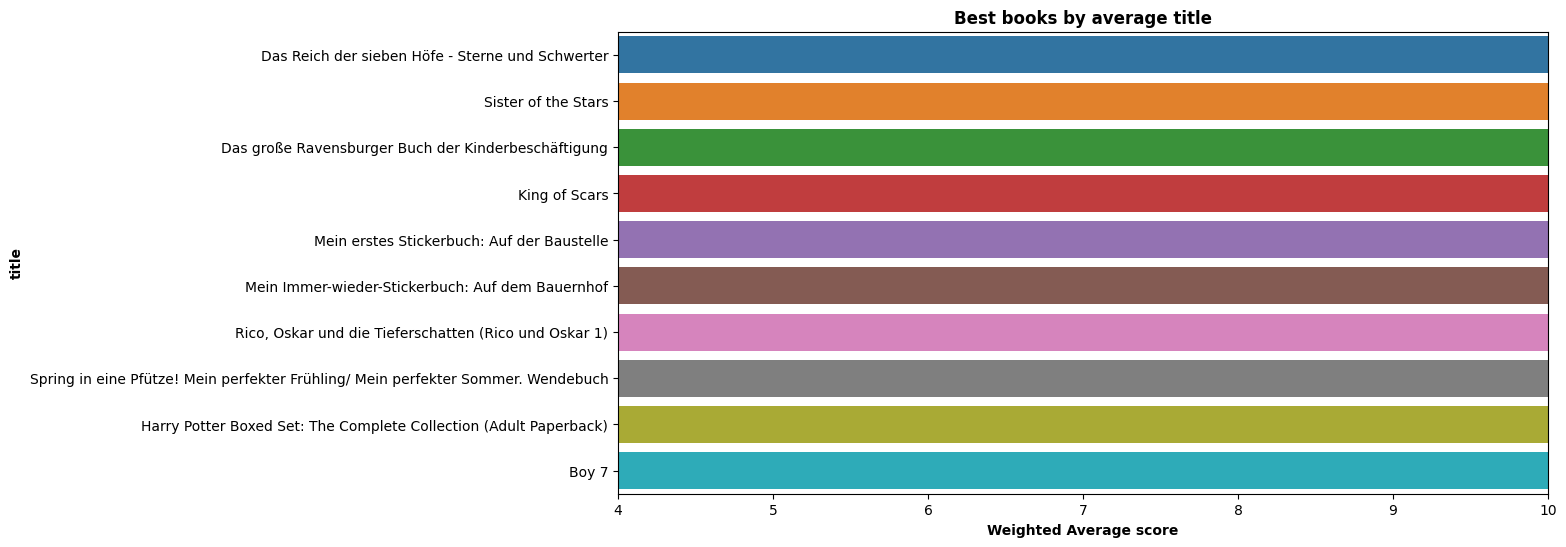

In [ ]:
weighted_average = book_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1 = sns.barplot(x=weighted_average['weighted_average'].head(10), y=weighted_average['title'].head(10))
plt.xlim(4,10)
plt.title("Best books by average title", weight='bold')
plt.xlabel("Weighted Average score", weight='bold')
plt.ylabel("title", weight='bold')
plt.savefig('Best Book.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
book_scaled_df=scaling.fit_transform(combine[['weighted_average']])
book_normalized_df=pd.DataFrame(book_scaled_df,columns=['weighted_average'])
book_normalized_df.head(20)

,weighted_average
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
combine[['normalized_weight_average']]= book_normalized_df

In [ ]:
combine.head(10)

,sessionID,itemID,click,basket,order,title,author,publisher,main topic,subtopics,weighted_average,normalized_weight_average
0,0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],NaN,NaN
1,89272,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],NaN,NaN
2,183856,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],NaN,NaN
3,1,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN
4,771,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN
5,2411,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN
6,4023,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN
7,4243,73018,0,1,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN
8,10757,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN
9,16084,73018,5,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",NaN,NaN


In [ ]:
combine['score'] = combine['normalized_weight_average'] * 0.5
movies_scored_df = combine.sort_values(['score'], ascending=False)
movies_scored_df[['title', 'normalized_weight_average', 'score']].head(20)

,title,normalized_weight_average,score
44854,Das Reich der sieben Höfe - Sterne und Schwerter,1.000000,0.500000
111243,Sister of the Stars,1.000000,0.500000
211852,Ocean City 1 - Jede Sekunde zählt,0.909091,0.454545
192147,"Die Gabel, die Hexe und der Wurm. Geschichten aus Alagaësia. Band 1: Eragon",0.909091,0.454545
277257,Das Böse Buch,0.909091,0.454545
186112,Little Women,0.909091,0.454545
185670,Boy 7,0.909091,0.454545
26042,Harry Potter Boxed Set: The Complete Collection (Adult Paperback),0.909091,0.454545
183863,Das große Ravensburger Buch der Kinderbeschäftigung,0.909091,0.454545
118557,"Rico, Oskar und die Tieferschatten (Rico und Oskar 1)",0.909091,0.454545


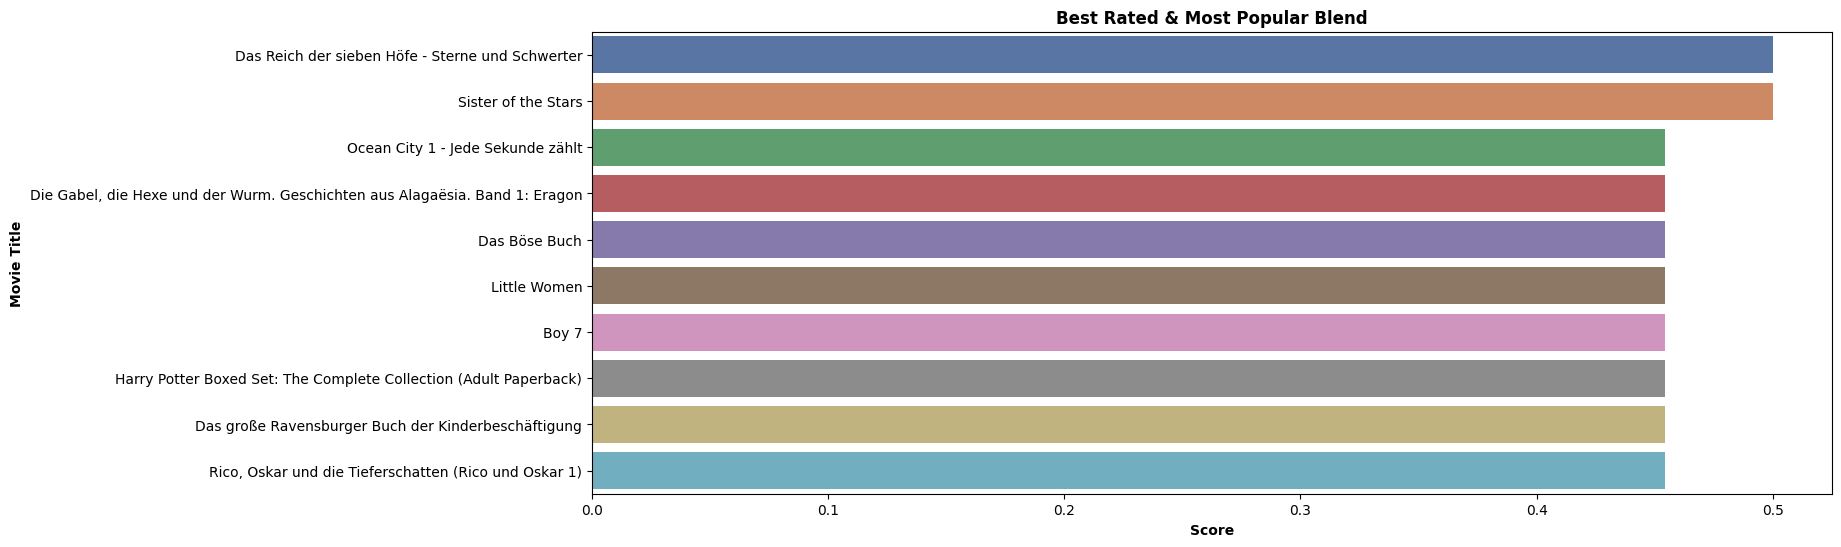

In [ ]:
scored_df = combine.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')